In [1]:
import numpy as np
import math
from scipy import stats
from scipy import optimize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
#Assume the number of hurricane follows the Poisson distribution
mean = 6.3
variance = 6.3 #in a Poission distribution mean = variance
value = 15

Z = abs(value - mean)/ math.sqrt(variance)
print('Z: ', Z)

p = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print('P-value: ', p)

#The  Z score found is larger than 3, so the number is signficantly different.
#The probability that in a year we have 15 or more hurricanes is 0.05%

Z:  3.4661629670697414
P-value:  0.0005279431738299246


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [33]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.sqrt(np.var(pre, ddof=1))
sigma2 = np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((sigma1**2 + sigma2**2)/2)

pre_mean = np.mean(pre)
post_mean = np.mean(post)
n = len(pre)

T = abs((pre_mean-post_mean)/(sigma * np.sqrt(2/n)))
print('T value: ', T)

#p-value
p = 1 - (stats.t.cdf(T, n - 1) -  stats.t.cdf(-T, n - 1))
print('P-value: ', p)

#the p-value is < 0.05, so the change in blood pressures is statistically significant.

T value:  3.786997938137629
P-value:  0.004302464132864614


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

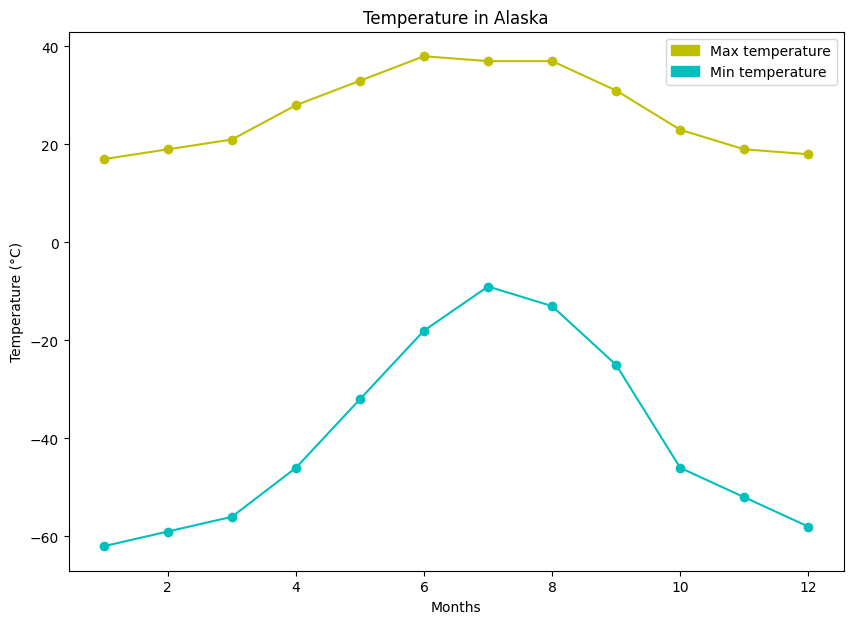

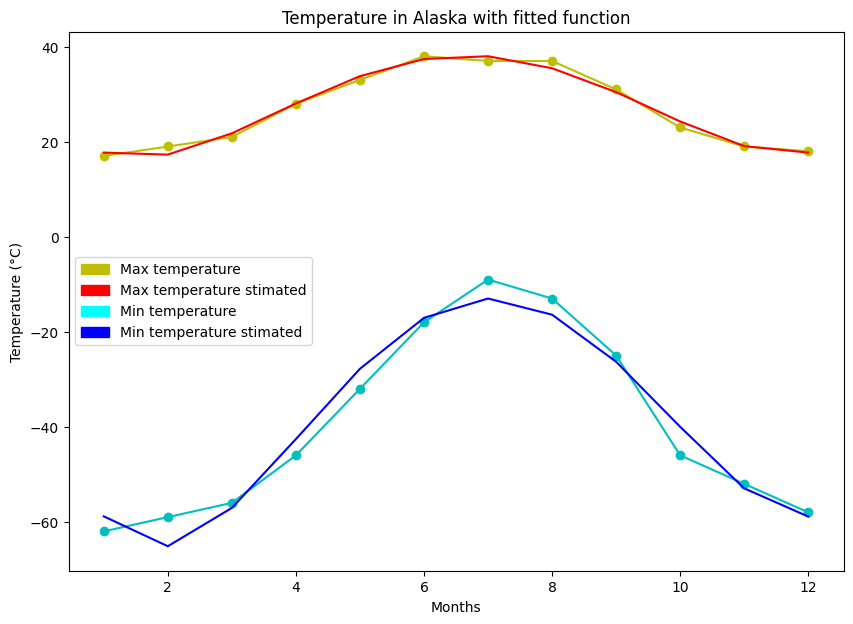

In [65]:
high = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
low = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Plot the temperatures
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])# Months
y = high # average high
z = low # average low

fig = plt.figure(figsize=(10,7))
plt.plot(x,y, 'yo-', x, z, 'co-')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Alaska')

high_legend = mpatches.Patch(color='y', label='Max temperature')
low_legend = mpatches.Patch(color='c', label='Min temperature')
plt.legend(handles=[high_legend,low_legend])
plt.show()

#Find a suitable a function that can describe min and max temperatures
def func(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

#Fit this function to the data
popt_high, pcov = optimize.curve_fit(func, x, y)
popt_low, pcov = optimize.curve_fit(func, x, z)

y_new = func(x, *popt_high)
z_new = func(x, *popt_low)

fig = plt.figure(figsize=(10,7))
plt.plot(x, y, 'yo-', x,y_new, 'r', x, z, 'co-', x, z_new, 'b')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Alaska with fitted function')

high_legend = mpatches.Patch(color='y', label='Max temperature')
high_legend_stim = mpatches.Patch(color='red', label='Max temperature stimated')
low_legend = mpatches.Patch(color='cyan', label='Min temperature')
low_legend_stim = mpatches.Patch(color='blue', label='Min temperature stimated')
plt.legend(handles=[high_legend, high_legend_stim,low_legend,low_legend_stim])
plt.show()


#As you can see in the plot, the fit is reasonable.
#The time offset for min and max temperatures is not the same.

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

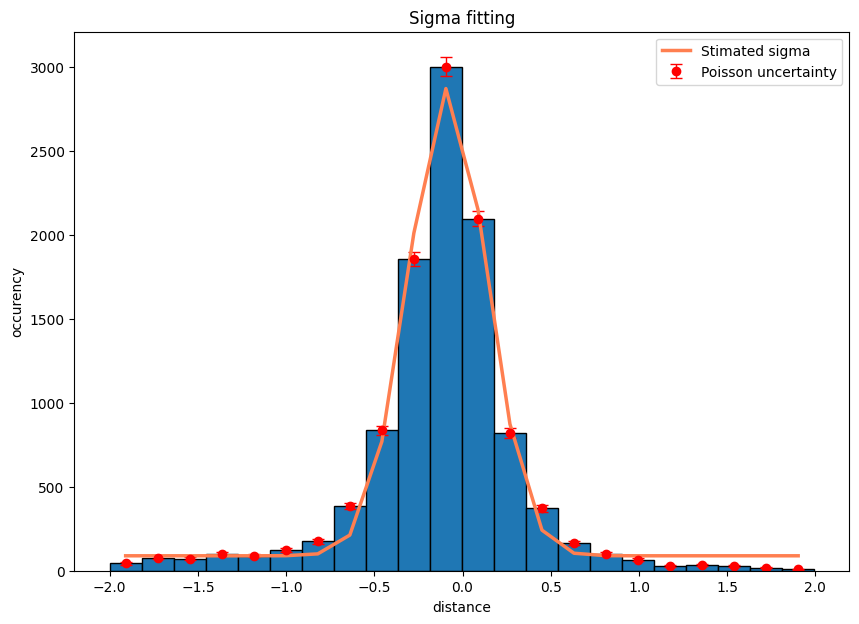

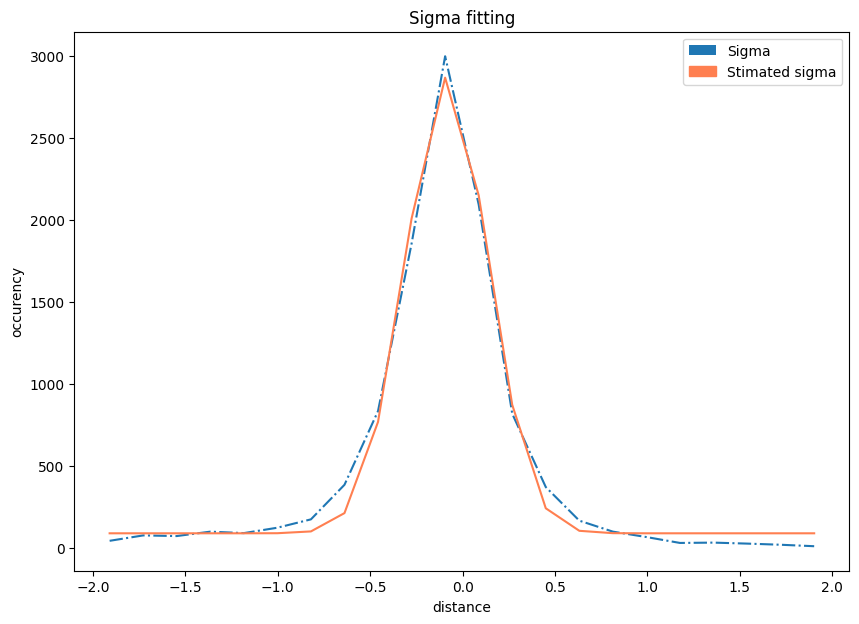

p value : 1.6844247346873214e-121


In [99]:
data = pd.read_pickle('residuals_261.pkl').tolist()
# Convert to data Frame
df = pd.DataFrame(data)
#df

#Considering only the "residual" feature
#create an histogram with the appropriate binning and plot it

#Filter datas
df = df[ abs(df['residuals']) < 2]

# print the histogram
fig = plt.figure(figsize=(10,7))
n, bins, _ = plt.hist(df['residuals'], bins=22, edgecolor='k')

#Set the appropriate Poisson uncertainty for each bin
bins_center = lambda i: (bins[i+1]+bins[i])/2
i = np.arange(0,len(bins)-1, 1)
y = n
x = bins_center(i)

sigma = np.sqrt(n)
uncert = sigma

plt.errorbar(x, y, yerr=uncert, fmt='o', c='red', linewidth=1, capsize=4, label= "Poisson uncertainty")


#By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
def func(x, A, offset, sigma, c):
    return c + (A * stats.norm.pdf(x,offset,sigma))

p0 =[1000,1,1,1]

popt, pcov = optimize.curve_fit(func, x, y, p0)
y_new = func(x, *popt)

plt.plot(x, y_new, 'coral', linewidth=2.5, label='Stimated sigma')
plt.xlabel('distance')
plt.ylabel('occurency')
plt.title('Sigma fitting')
plt.legend()

plt.show()

#Plot 2 fit
fig2 = plt.figure(figsize=(10,7))
plt.plot(x, y, '-.', x,y_new, 'coral')
plt.xlabel('distance')
plt.ylabel('occurency')
plt.title('Sigma fitting')
sigma = mpatches.Patch(label='Sigma')
sigma_stim = mpatches.Patch(color='coral', label='Stimated sigma')
plt.legend(handles=[sigma, sigma_stim])
plt.show()

#Perform a goodness-of-fit test #DA SISTEMARE
test, p_value = stats.chisquare(y, y_new, ddof=4)
print('p value : ' + str(p_value))

#Is the p-value of the fit satisfactory? No, it isn't.

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

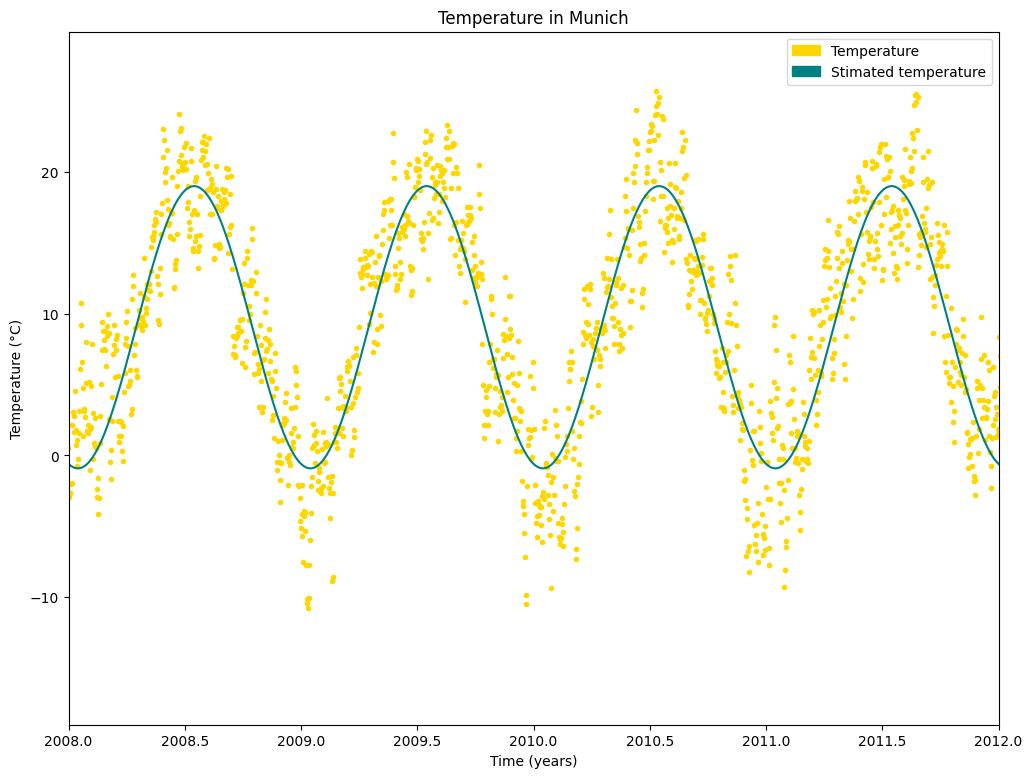

The best-fit values of the parameters are: 
 a= -9.955183583195634 
 b= 12.31340590753564 
 c= 9.040845452192942


The overall average temperature in Munich is  8.933222104668378 °C
The overall average stimated temperature in Munich is  8.933222104681006 °C


The typical daily value predicted by the model for the hottest time of year is 18.995869658316174 °C
The typical daily value predicted by the model for the coldest time of year is -0.9142093884356193 °C


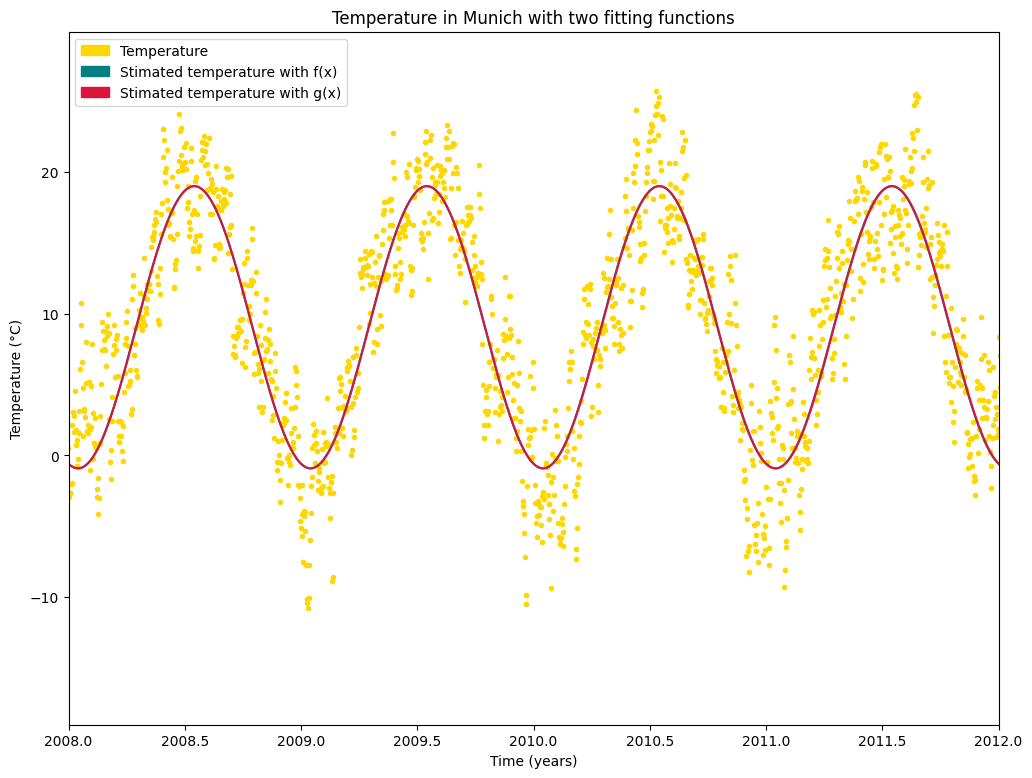

SSR for f(x): 329861.4307299942
R^2 for f(x): 0.22456793013016552


SSR for g(x): 329881.82956438913
R^2 for g(x): 0.224519976932537


The difference between the R^2 values for the models is 
 4.795319762851413e-05


p-value: 1.000 , additional parameter necessary: NO


In [109]:
f = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=' ', header=None)
f.columns = ['Date', 'Temperature']
df = pd.DataFrame(f)
#print(df)

#filter to remove bad data
df = df.drop(df[abs(df['Temperature']) > 50].index)

#define the axis
#t is the time in years
t = df['Date']
y = df['Temperature']

#define the given function f
def func_f(t, a, b, c):
    f = a*np.cos(2*math.pi*t + b) + c
    return f

#fit the function to the data
poptf, pcovf = optimize.curve_fit(func_f, t, y)
y_new = func_f(t, *poptf)

#Make a plot of the data and the best-fit model
fig = plt.figure(figsize=(12,9))
plt.scatter(t,y, c='gold', marker='.')
plt.plot(t, y_new,'teal')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (°C)')

#range 2008 to 2012
plt.xlim(2008, 2012)

plt.title('Temperature in Munich')
temp = mpatches.Patch(color='gold', label='Temperature')
temp_stim = mpatches.Patch(color='teal', label='Stimated temperature')
plt.legend(handles=[temp, temp_stim])
plt.show()

#best-fit values of the parameters
print('The best-fit values of the parameters are: \n a=', poptf[0], '\n b=', poptf[1], '\n c=', poptf[2] )

#overall average temperature
print('\n')
print('The overall average temperature in Munich is ', np.mean(y), '°C')
print('The overall average stimated temperature in Munich is ', np.mean(y_new), '°C')

#typical daily average values predicted by the model for the coldest and hottest time of year
hottest = np.max(y_new)
coldest = np.min(y_new)

print('\n')
print('The typical daily value predicted by the model for the hottest time of year is',hottest,'°C')
print('The typical daily value predicted by the model for the coldest time of year is',coldest,'°C')

# b is the phase of the signal, it's "the horizontal shift"

#define the given function g
def func_g(t, a, b, c, d):
    f = a*np.cos(2*math.pi*b*t + c) + d
    return f

#fit the data with the function g
poptg, pcovg = optimize.curve_fit(func_g, t, y)
y_newg = func_g(t, *poptg)

#Make a plot of the data and the best-fit model
fig2 = plt.figure(figsize=(12,9))
plt.scatter(t,y, c='gold', marker='.')
plt.plot(t, y_new,'teal', t, y_newg, 'crimson')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (°C)')

#range 2008 to 2012
plt.xlim(2008, 2012)

plt.title('Temperature in Munich with two fitting functions')
temp = mpatches.Patch(color='gold', label='Temperature')
temp_stim = mpatches.Patch(color='teal', label='Stimated temperature with f(x)')
temp_stimg = mpatches.Patch(color='crimson', label='Stimated temperature with g(x)')
plt.legend(handles=[temp, temp_stim, temp_stimg])
plt.show()

#ssr
ssr_f = np.sum((y_new - np.mean(y))**2)
tss = np.sum((np.mean(y) - y)**2)
r2f = 1-ssr_f/tss
print('SSR for f(x):',ssr_f)
print('R^2 for f(x):',r2f)
print('\n')
ssr_g = np.sum((y_newg - np.mean(y))**2)
r2g = 1-ssr_g/tss
print('SSR for g(x):',ssr_g)
print('R^2 for g(x):',r2g)

diff =abs(r2f-r2g)
print('\n')
print('The difference between the R^2 values for the models is \n', diff)

#Use the Fisher F-test to determine whether the additional parameter is motivated

# define alpha
alpha = 0.05 #alpha could also be 0.10

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, ntot, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(ntot - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, ntot - ndof_2)
    if verbose: 
        print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO") 
    return pval

print('\n')
pval_f_vs_g = Ftest(ssr_f, ssr_g, 3, 4, len(t), verbose=True)

